# lec05. NN (Neural Network, FC)
* 인공신경망

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, InputLayer,Flatten
import tensorflow as tf


import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# from sklearn.datasets import load_boston
from keras.datasets     import mnist



In [5]:
np.random.seed(0)
tf.random.set_seed(0)

# Data Load

In [14]:
X_train = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
y_train = np.array([[0], [1], [1]])

# 모델 

In [10]:
input_layer = InputLayer(input_shape=(3,))
hidden_layer = Dense(units=4, activation='relu')
output_layer = Dense(units=2, activation='softmax')
model =  Sequential([
  input_layer,
  hidden_layer,
  output_layer
  ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 16        
                                                                 
 dense_7 (Dense)             (None, 2)                 10        
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='mse', optimizer='Adam')

# 은닉층(hidden_layer) 출력 확인하기

In [22]:
model.layers[0].output

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_6')>

In [21]:
model.get_layer('dense_6').output

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_6')>

In [28]:
hidden_layer_model = Model(inputs=model.input, outputs=model.layers[0].output)
hidden_layer_output = hidden_layer_model(X_train)

print('======== Inputs ========')
print(X_train)

print('\n======== Weights ========')
print(hidden_layer.get_weights()[0])

print('\n======== Outputs : ReLU(np.dot(x, w)========')
print(hidden_layer_output)



======== Inputs ========
[[1 0 0]
 [0 1 0]
 [0 0 1]]

======== Weights ========
[[-0.5643544   0.44471443 -0.0225867   0.6949582 ]
 [-0.17199272 -0.8988821   0.38799608 -0.24902666]
 [ 0.14971566  0.7422098  -0.6817321   0.08326364]]

======== Outputs : ReLU(np.dot(x, w)========
tf.Tensor(
[[0.         0.44471443 0.         0.6949582 ]
 [0.         0.         0.38799608 0.        ]
 [0.14971566 0.7422098  0.         0.08326364]], shape=(3, 4), dtype=float32)


# 출력층(output_layer) 출력 확인하기

In [31]:
pred = model.predict(X_train)
print('\n======== pred ========')
print(pred)


======== pred ========
[[0.5175798  0.48242024]
 [0.50199926 0.49800074]
 [0.6386608  0.36133918]]


# 가중치 확인

In [34]:
weights = model.get_weights()
weights

[array([[-0.5643544 ,  0.44471443, -0.0225867 ,  0.6949582 ],
        [-0.17199272, -0.8988821 ,  0.38799608, -0.24902666],
        [ 0.14971566,  0.7422098 , -0.6817321 ,  0.08326364]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.64972925, -0.36405158],
        [ 0.71109486, -0.16548204],
        [-0.5281601 , -0.5487714 ],
        [ 0.1980567 ,  0.6577654 ]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [35]:
model.set_weights(weights)
print(model.get_weights())

[array([[-0.5643544 ,  0.44471443, -0.0225867 ,  0.6949582 ],
       [-0.17199272, -0.8988821 ,  0.38799608, -0.24902666],
       [ 0.14971566,  0.7422098 , -0.6817321 ,  0.08326364]],
      dtype=float32), array([0., 0., 0., 0.], dtype=float32), array([[-0.64972925, -0.36405158],
       [ 0.71109486, -0.16548204],
       [-0.5281601 , -0.5487714 ],
       [ 0.1980567 ,  0.6577654 ]], dtype=float32), array([0., 0.], dtype=float32)]


In [40]:
print(weights[0].shape)
print(weights[1].shape)
print(weights[2].shape)
print(weights[3].shape)

(3, 4)
(4,)
(4, 2)
(2,)


# 가중치 적용 모델 재구성

In [43]:
# 3. 모델 구성
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(512, activation=tf.nn.relu, use_bias=False),
  Dense(10, activation=tf.nn.softmax, use_bias=False)
])

weights = model.get_weights()

print(weights)
print(len(weights))

print(weights[0].shape)
print(weights[1].shape)

[array([[-0.0661997 , -0.05542319, -0.00184334, ...,  0.06040917,
         0.00923988,  0.00344074],
       [ 0.02670744,  0.01885773, -0.02440755, ...,  0.05757166,
        -0.05688847,  0.04609665],
       [ 0.00348741,  0.06168006, -0.06192341, ...,  0.0039708 ,
         0.01299342, -0.0566762 ],
       ...,
       [ 0.00922745, -0.06580307, -0.04880428, ..., -0.06038167,
         0.03672916,  0.04943163],
       [ 0.0641048 , -0.06585594,  0.01186454, ...,  0.05630555,
        -0.03557849,  0.06257528],
       [ 0.02940424, -0.01366196,  0.03396847, ...,  0.06701964,
        -0.05700074,  0.06546101]], dtype=float32), array([[-0.02202152,  0.03562982, -0.07478411, ...,  0.06562381,
        -0.05857898, -0.09240679],
       [ 0.00299827,  0.06149774, -0.07925921, ...,  0.00915465,
         0.08889817, -0.06607331],
       [ 0.06523602, -0.03345864,  0.07843926, ...,  0.07434996,
        -0.01042911,  0.09479173],
       ...,
       [ 0.02329087, -0.02392936,  0.01120333, ...,  0.024

# RandomNormal 

[array([[2.0416415, 2.038124 , 1.9847361, ..., 1.9792725, 2.023481 ,
        2.0344596],
       [2.0089567, 2.0247881, 2.0484846, ..., 2.0318325, 1.8741969,
        2.0058174],
       [1.9560302, 1.9856726, 2.0244684, ..., 1.9817377, 2.0328732,
        2.0900898],
       ...,
       [1.9467025, 1.9941446, 1.9938695, ..., 2.0436187, 1.9626455,
        2.003143 ],
       [2.1448028, 2.0049112, 1.9640114, ..., 1.9651076, 1.9986618,
        1.9544768],
       [2.0190773, 1.954591 , 2.088764 , ..., 1.8994648, 2.0600438,
        2.0058026]], dtype=float32), array([[-1.9865074, -1.9952382, -1.990021 , ..., -2.0054867, -1.9945837,
        -1.995364 ],
       [-1.9982061, -2.0081196, -2.0203786, ..., -1.9915028, -2.001952 ,
        -2.0081356],
       [-1.993816 , -1.9819204, -1.9996343, ..., -2.0118055, -2.0126922,
        -1.9811147],
       ...,
       [-1.9863311, -1.996919 , -2.010277 , ..., -2.0079741, -1.9763048,
        -2.004481 ],
       [-2.001847 , -2.004067 , -1.9995575, ..., -1.99

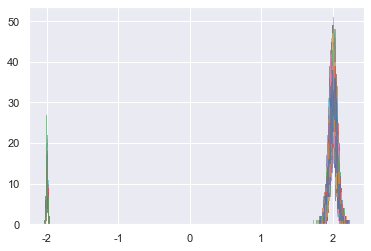

In [45]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# tf.keras.initializers.RandomNormal 사용하기
initializer1 = tf.keras.initializers.RandomNormal(mean=2.0, stddev=0.05, seed=None)
initializer2 = tf.keras.initializers.RandomNormal(mean=-2.0, stddev=0.01, seed=None)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, use_bias=False, kernel_initializer=initializer1),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax, use_bias=False, kernel_initializer=initializer2)
])

weights = model.get_weights()
print(weights)

plt.hist(weights[0], bins=100, alpha=0.7, histtype='step')
plt.hist(weights[1], bins=100, alpha=0.7, histtype='step')
plt.show()

# RandomUniform

[array([[-0.04050793,  0.0281483 ,  0.03243944, ...,  0.03383524,
        -0.0127926 ,  0.03523726],
       [ 0.01308379, -0.00581348, -0.03325216, ..., -0.00680916,
        -0.01774889, -0.00881022],
       [-0.03188099,  0.00753193, -0.02938407, ..., -0.04752439,
        -0.00716919,  0.02583643],
       ...,
       [-0.02513367, -0.0307479 , -0.01876351, ...,  0.01243149,
         0.02593647,  0.03951779],
       [ 0.04426315,  0.03517571, -0.01712874, ..., -0.02187018,
        -0.03427137,  0.00256746],
       [-0.04170638, -0.04337412,  0.03561859, ..., -0.00373093,
         0.03304461, -0.03849938]], dtype=float32), array([[-0.03967037,  0.04149909, -0.07004289, ...,  0.07312923,
         0.06870282,  0.07358838],
       [-0.0608969 ,  0.07211151,  0.01639125, ...,  0.0932539 ,
        -0.0755441 , -0.08721402],
       [ 0.05028249,  0.05185504,  0.06891698, ...,  0.07063694,
         0.06543393, -0.03229396],
       ...,
       [-0.02716744, -0.02069101, -0.00779577, ...,  0.090

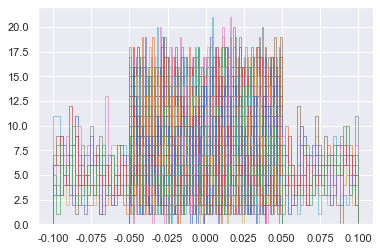

In [46]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# tf.keras.initializers.RandomNormal
initializer1 = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)
initializer2 = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None)

model = tf.keras.models.Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(512, activation=tf.nn.relu, use_bias=False, kernel_initializer=initializer1),
  Dense(10, activation=tf.nn.softmax, use_bias=False, kernel_initializer=initializer2)
])

weights = model.get_weights()
print(weights)

plt.hist(weights[0], bins=100, alpha=0.7, histtype='step')
plt.hist(weights[1], bins=100, alpha=0.7, histtype='step')
plt.show()